In [3]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
IMAGE_SIZE = [224, 224]

train_data_dir = 'gdrive/My Drive/Kaggle/data/train'
validation_data_dir = 'gdrive/My Drive/Kaggle/data/validation'

In [5]:
mn = MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in mn.layers:
  layer.trainable = False

17227776/17225924 [==============================] - 0s 0us/step


In [6]:
folders = glob('gdrive/My Drive/Kaggle/data/train/*')
print(len(folders))

2


In [7]:
# our layers - you can add more if you want
x = Flatten()(mn.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
model = Model(inputs=mn.input, outputs=prediction)

In [9]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_data_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(validation_data_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2048 images belonging to 2 classes.
Found 832 images belonging to 2 classes.


In [12]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
64/64 [==============================] - 1431s 22s/step - loss: 0.4962 - accuracy: 0.9463 - val_loss: 0.2121 - val_accuracy: 0.9724
Epoch 2/5
64/64 [==============================] - 129s 2s/step - loss: 0.2256 - accuracy: 0.9800 - val_loss: 0.3343 - val_accuracy: 0.9675
Epoch 3/5
64/64 [==============================] - 128s 2s/step - loss: 0.1768 - accuracy: 0.9839 - val_loss: 0.3127 - val_accuracy: 0.9748
Epoch 4/5
64/64 [==============================] - 128s 2s/step - loss: 0.1330 - accuracy: 0.9883 - val_loss: 0.7043 - val_accuracy: 0.9639
Epoch 5/5
64/64 [==============================] - 129s 2s/step - loss: 0.1094 - accuracy: 0.9907 - val_loss: 0.4320 - val_accuracy: 0.9724


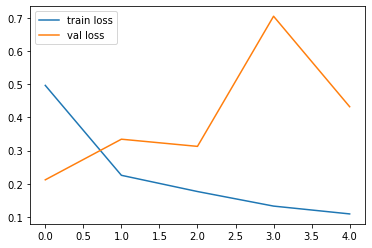

In [13]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

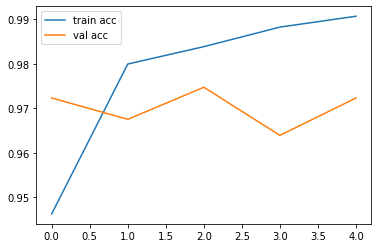

In [16]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()